## Observations and Insights 

In [626]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
import csv

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df= pd.DataFrame.merge(mouse_metadata,study_results,
                    on="Mouse ID", how="outer")
# Display the data table for preview
merge_df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [627]:
current_num_m= len(merge_df["Mouse ID"])
print(f"The current number of mice in the study is {current_num_m}")


The current number of mice in the study is 1893


In [628]:
# 1.-----------CLEANING THE DATA

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouse=merge_df.loc[merge_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
print(f"The duplicated mouse in the study is {duplicated_mouse}")


# Get all the data for the duplicate mouse ID. 
clean_study_df= merge_df.drop_duplicates(subset=["Mouse ID","Timepoint"],keep='first', inplace=False)
clean_study_df.loc[clean_df["Mouse ID"]=="g989"]

The duplicated mouse in the study is ['g989']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


In [629]:
# Checking for null values 
na=clean_study_df.isnull().values.any()

# Checking for the sum of null values 
null= clean_study_df.isnull().sum()
null

Mouse ID              0
Drug Regimen          0
Sex                   0
Age_months            0
Weight (g)            0
Timepoint             0
Tumor Volume (mm3)    0
Metastatic Sites      0
dtype: int64

In [630]:
# Checking the number of mice in the clean DataFrame.
num_mice =len(clean_study_df["Mouse ID"])
print(f"The final number of mice in the study with no duplicated is {num_mice}")


The final number of mice in the study with no duplicated is 1888


In [631]:
clean_study_df.dtypes


Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [632]:
clean_study_df["Drug Regimen"].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     156
Name: Drug Regimen, dtype: int64

## Summary Statistics

In [633]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM 
#of the tumor volume for each regimen

mean_tumor = clean_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumor = clean_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
var_tumor = clean_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std_tumor = clean_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem_tumor = clean_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

statistcs_df= pd.DataFrame({"Mean":mean_tumor, "Median":median_tumor,"Variance":var_tumor, "Stan_Dev":std_tumor, "SEM":sem_tumor})
statistcs_df

,Mean,Median,Variance,Stan_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [634]:
# Drug regime per Tumor volume statistics: in a single line mean, median, variance, standard deviation and sem in one line
stats_tumor = clean_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg([np.mean,np.median,np.var,np.std,st.sem])
stats_tumor

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Total Measurements per Drug Regime')

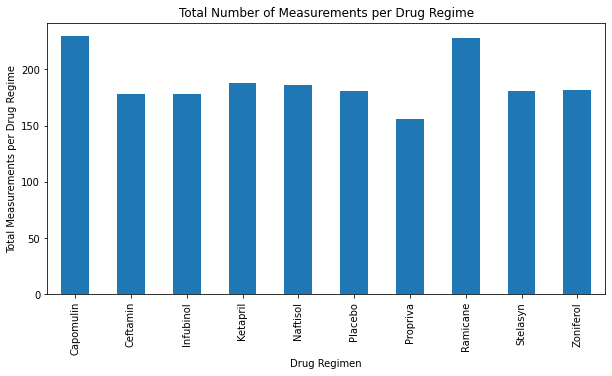

In [635]:
# Generate a bar plot showing the total number of measurements taken per drug regimen using pandas.
total_measures = clean_study_df.groupby(["Drug Regimen"]).count()["Tumor Volume (mm3)"]
total_measures

#Plotting total measurements
plot_total_measures = total_measures.plot(kind="bar",rot=90, figsize=(10,5))
plt.title("Total Number of Measurements per Drug Regime")
plt.ylabel("Total Measurements per Drug Regime")

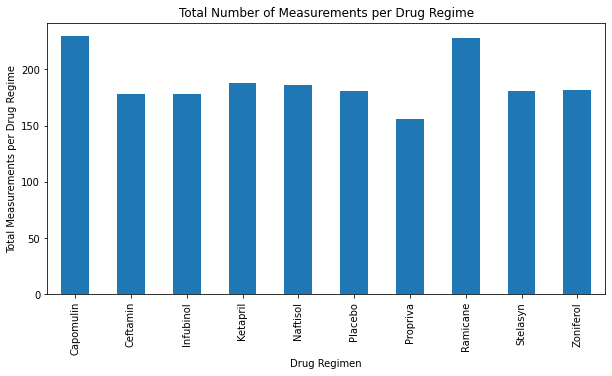

In [636]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.


#Plotting total measurements

#Plotting total measurements
plot_total_measures = total_measures.plot(kind='bar',rot=90, figsize=(10,5))
plt.title("Total Number of Measurements per Drug Regime")
plt.ylabel("Total Measurements per Drug Regime")
plt.show()



In [637]:
# 3.--------Pie Charts

In [638]:
# Find the distribution of female versus male mice using pandas
total_mice_grouped= clean_study_df.groupby(["Sex","Mouse ID"]).size()
total_mice= len(total_mice_grouped)
print(f"The total number of mice is {total_mice}")
#--------Male mice
male_mice = total_mice_grouped["Male"].count()
percent_male_mice = male_mice/total_mice*100
print(f"The number of Male mice is {male_mice} and the percentage is {percent_male_mice}")

#--------Female mice
female_mice = total_mice_grouped["Female"].count()
percent_female_mice = female_mice/total_mice*100
print(f"The number of Female mice is {female_mice} and the percentage is {percent_female_mice}")


The total number of mice is 249
The number of Male mice is 125 and the percentage is 50.20080321285141
The number of Female mice is 124 and the percentage is 49.79919678714859


In [639]:
#----- Summary of mice in the study
male_female_df = pd.DataFrame({"Distribution of mice":[male_mice,female_mice],"Percentage":[percent_male_mice,percent_female_mice]},
                               index=["Male", "Female"])
male_female_df

,Distribution of mice,Percentage
Male,125,50.200803
Female,124,49.799197


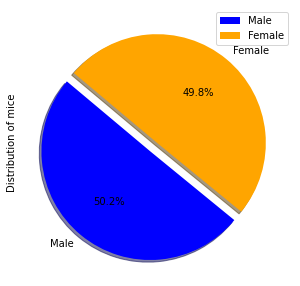

In [640]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
explode = (0.1, 0)
colors = ['blue', 'orange']
male_female_df_plot = male_female_df.plot.pie(y='Distribution of mice',figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")


(-1.1762367126898932,
 1.1254463310846248,
 -1.190308764526366,
 1.124996700756096)

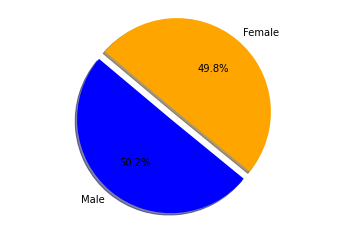

In [641]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [male_mice,female_mice]

# The colors of each section of the pie chart
colors = ["blue", "orange"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)

# Creating the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

#Set equal axis
plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [664]:
clean_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [719]:
# Calculate the final tumor volume for the Top four Drug Regimenes "Capomulin", "Ramicane", "Infubinol", "Ceftamin"

final_tumor_vol = clean_study_df[clean_study_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
final_tumor_vol = final_tumor_vol.sort_values(["Timepoint"], ascending=True)
final_tumor_vol_sorted = final_tumor_vol.sort_values(by= "Tumor Volume (mm3)", ascending=False )
final_tumor_vol_sorted

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
637,c139,Infubinol,Male,11,28,45,72.226731,2
636,c139,Infubinol,Male,11,28,40,69.428141,2
1033,k210,Ceftamin,Male,15,28,45,68.923185,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
463,a203,Infubinol,Female,20,23,45,67.973419,2
...,...,...,...,...,...,...,...,...
7,k403,Ramicane,Male,21,16,35,26.546993,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [723]:
#DataFrame with the Top 4 Drug regimenes sorted by Tumor Volume
final_tumor_vol_sorted = final_tumor_vol_sorted.groupby(["Drug Regimen", "Mouse ID"]).last()["Tumor Volume (mm3)"]
final_tumor_vol_sorted = final_tumor_vol_sorted.to_frame()
final_tumor_vol_sorted.head()

Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               37.967644
             b742               37.950355
             f966               30.485985
             g288               36.356851
             g316               40.159220

In [730]:
tumor_measures_df

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,"[37.96764437, 37.95035546, 30.48598484, 36.356..."
Ramicane,"[38.08737318, 41.71461874, 35.590254, 32.97852..."
Infubinol,"[45.0, 45.0, 45.0, 45.0, 45.0, 36.3213458, 45...."
Ceftamin,"[45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45...."


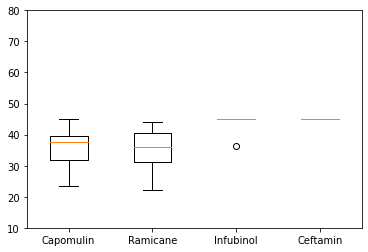

In [729]:
#Listing top drug remines to label dataframe
best_treat = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
summary_top_df = final_tumor_vol_sorted.reset_index()
tumor_measures = summary_top_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(list)
tumor_measures_df = pd.DataFrame(tumor_measures)
tumor_measures_df = tumor_measures_df.reindex(best_treat)
tumor_volumes = [vol for vol in tumor_measures_df["Tumor Volume (mm3)"]]
plt.boxplot(tumor_volumes, labels=best_treat)
plt.ylim(10, 80)
plt.show()

In [352]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

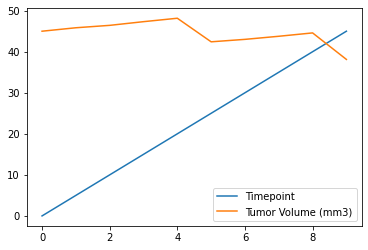

In [731]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
time_tumor = clean_study_df[clean_study_df["Mouse ID"].isin(["j119"])]
time_tumor

time_tumor_df = final_tumor_vol
[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_tumor_df

line_plot = time_tumor_df.reset_index()
line_plot

line_plot_graph = line_plot[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot_graph

lines = line_plot_graph.plot.line()

In [732]:
# Generating a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tumor_volume_list = line_plot_graph['Tumor Volume (mm3)'].tolist()
timepoint_list = line_plot_graph['Timepoint'].tolist()

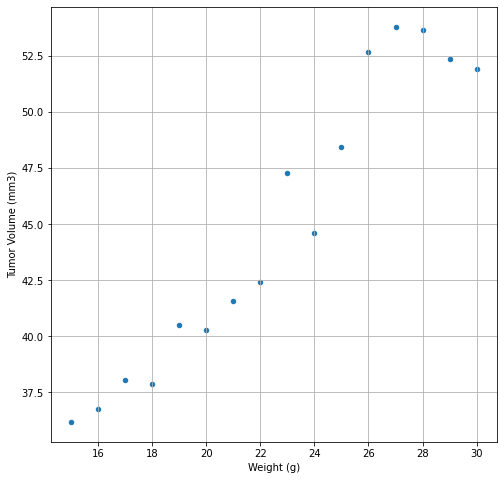

In [739]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

cap_scatter = final_tumor_vol[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]

cap_sorted = cap_scatter.sort_values(["Weight (g)"], ascending=True)

cap_scat_plot = cap_scatter.reset_index()

cap_group_weight = cap_scat_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

cap_group_plot = pd.DataFrame(cap_group_weight).reset_index()

cap_scatter = cap_group_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (8,8))

## Correlation and Regression

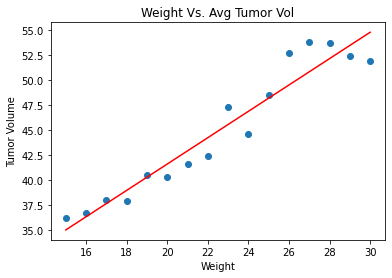

In [740]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = cap_group_plot["Weight (g)"]
y_values = cap_group_plot["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight Vs. Avg Tumor Vol")
plt.show()